# Análise de Features com Mutual Information 🧠

Este notebook demonstra como usar a classe **FeatureAnalyzer** para analisar a importância das features do dataset SVM utilizando **Mutual Information**.

## 🎯 Objetivos:
- Carregar e preparar o dataset SVM
- Realizar análise de Mutual Information das features
- Configurar e testar diferentes thresholds
- Visualizar rankings e distribuições das features
- Selecionar as features mais relevantes
- Integrar com DatasetManager para workflow completo

## 1. Importar Bibliotecas e Configurações 📚

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Adicionar diretório scripts ao path
sys.path.append('./scripts')

print("✅ Bibliotecas importadas com sucesso!")
print(f"📁 Diretório atual: {os.getcwd()}")

# Verificar arquivos disponíveis
print(f"\n🔍 Arquivos disponíveis:")
if os.path.exists('./datasets'):
    for arquivo in os.listdir('./datasets'):
        if arquivo.endswith('.csv'):
            print(f"   📊 {arquivo}")
if os.path.exists('./scripts'):
    for arquivo in os.listdir('./scripts'):
        if arquivo.endswith('.py'):
            print(f"   🐍 {arquivo}")

✅ Bibliotecas importadas com sucesso!
📁 Diretório atual: d:\Pessoal\leopiresss\leopi\OneDrive - STJ- Superior Tribunal de Justiça\AIA\Cursos\Mestrado\Projeto Final\analise_kubemon_v2\scripts

🔍 Arquivos disponíveis:


## 2. Importar Classes Personalizadas 🔧

In [2]:
# Importar classes personalizadas
from feature_analyzer import FeatureAnalyzer
from dataset_manager import DatasetManager

print("✅ Classes personalizadas importadas:")
print("   🧠 FeatureAnalyzer - para análise de mutual information")
print("   📊 DatasetManager - para gerenciamento de datasets")

✅ Classes personalizadas importadas:
   🧠 FeatureAnalyzer - para análise de mutual information
   📊 DatasetManager - para gerenciamento de datasets


## 3. Carregar Dataset SVM 📂

In [3]:
# Carregar dataset SVM usando DatasetManager
dm = DatasetManager('svm_feature_analysis')

# Configurações para carregamento
arquivo_csv = '../datasets/svm.csv'
target_column = 'target'
colunas_excluir = ['os_timestamp', 'node_name', 'iteration']

# Carregar dados
try:
    dataset = dm.carregar_dados_csv(
        arquivo_csv=arquivo_csv,
        target_column=target_column,
        colunas_excluir=colunas_excluir,
        test_size=0.6,
        val_size=0.5,
        random_state=42
    )
    
    print("\n✅ Dataset SVM carregado com sucesso!")
    
    # Informações básicas do dataset
    print(f"\n📊 Informações do Dataset:")
    print(f"   • X_train shape: {dataset['X_train'].shape}")
    print(f"   • Número de features: {len(dataset['features'])}")
    print(f"   • Classes únicas: {np.unique(dataset['y_train'])}")
    print(f"   • Distribuição das classes no treino:")
    
    unique, counts = np.unique(dataset['y_train'], return_counts=True)
    for classe, count in zip(unique, counts):
        print(f"     Classe {classe}: {count:,} ({count/len(dataset['y_train'])*100:.1f}%)")

except Exception as e:
    print(f"❌ Erro ao carregar dataset: {e}")
    # Examinar o arquivo diretamente
    print("\n📋 Examinando arquivo CSV...")
    df_temp = pd.read_csv(arquivo_csv)
    print(f"   • Shape: {df_temp.shape}")
    print(f"   • Colunas: {list(df_temp.columns)}")
    print(f"   • Primeiras linhas:")
    print(df_temp.head())

🔧 Carregando dados do arquivo: ../datasets/svm.csv
📊 Informações do dataset:
   • Total de registros: 80,648
   • Total de features: 122
   • Colunas excluídas: ['os_timestamp', 'node_name', 'iteration', 'target']
   • Target codificado: {'interf': np.int64(0), 'normal': np.int64(1)}

✅ Dados preparados:
   • X_train shape: (32259, 122)
   • X_val shape: (24195, 122)
   • X_test shape: (24194, 122)
   • Classes únicas: [0 1]

✅ Dataset SVM carregado com sucesso!

📊 Informações do Dataset:
   • X_train shape: (32259, 122)
   • Número de features: 122
   • Classes únicas: [0 1]
   • Distribuição das classes no treino:
     Classe 0: 18,264 (56.6%)
     Classe 1: 13,995 (43.4%)


## 4. Criar Analisador de Features 🧠

In [ ]:
# Criar instância do FeatureAnalyzer com configurações iniciais
analyzer = FeatureAnalyzer()
features = analyzer.calcular_mutual_information(
    X=dm.dataset['X_train'], 
    y=dm.dataset['y_train'],
    tipo_problema='auto'  # Detecta automaticamente se é classificação ou regressão
)

dm_integracao.aplicar_selecao_features(features_selecionadas, salvar_automaticamente=True)
dm_integracao.aplicar_escalonamento(metodo='yeo-johnson', salvar_automaticamente=True)
dm_integracao.imprimir_informacoes()

NameError: name 'dm_integracao' is not defined

In [4]:
# Executar análise de mutual information
print("🔬 Iniciando análise de Mutual Information...")

# Calcular mutual information usando dados de treino
resultados = analyzer.calcular_mutual_information(
    X=dm.dataset['X_train'], 
    y=dm.dataset['y_train'],
    tipo_problema='auto'  # Detecta automaticamente se é classificação ou regressão
)

print(f"\n🎉 Análise concluída com sucesso!")

# Exibir estatísticas básicas
stats = resultados['statistics']
print(f"\n📈 Estatísticas dos Mutual Information Scores:")
print(f"   • Número total de features: {stats['total_features']}")
print(f"   • Média MI: {stats['mean_mi_score']:.6f}")
print(f"   • Desvio padrão MI: {stats['std_mi_score']:.6f}")
print(f"   • Máximo MI: {stats['max_mi_score']:.6f}")
print(f"   • Mínimo MI: {stats['min_mi_score']:.6f}")

print(f"\n🎯 Thresholds aplicados:")
print(f"   • Threshold absoluto (0.005): {stats['selected_by_threshold']} features")
print(f"   • Threshold percentil 75%: {stats['selected_by_percentile']} features")
print(f"   • Critério combinado: {stats['selected_combined']} features")

🔬 Iniciando análise de Mutual Information...


NameError: name 'analyzer' is not defined

📊 Gerando visualizações da análise por ranges de importância...


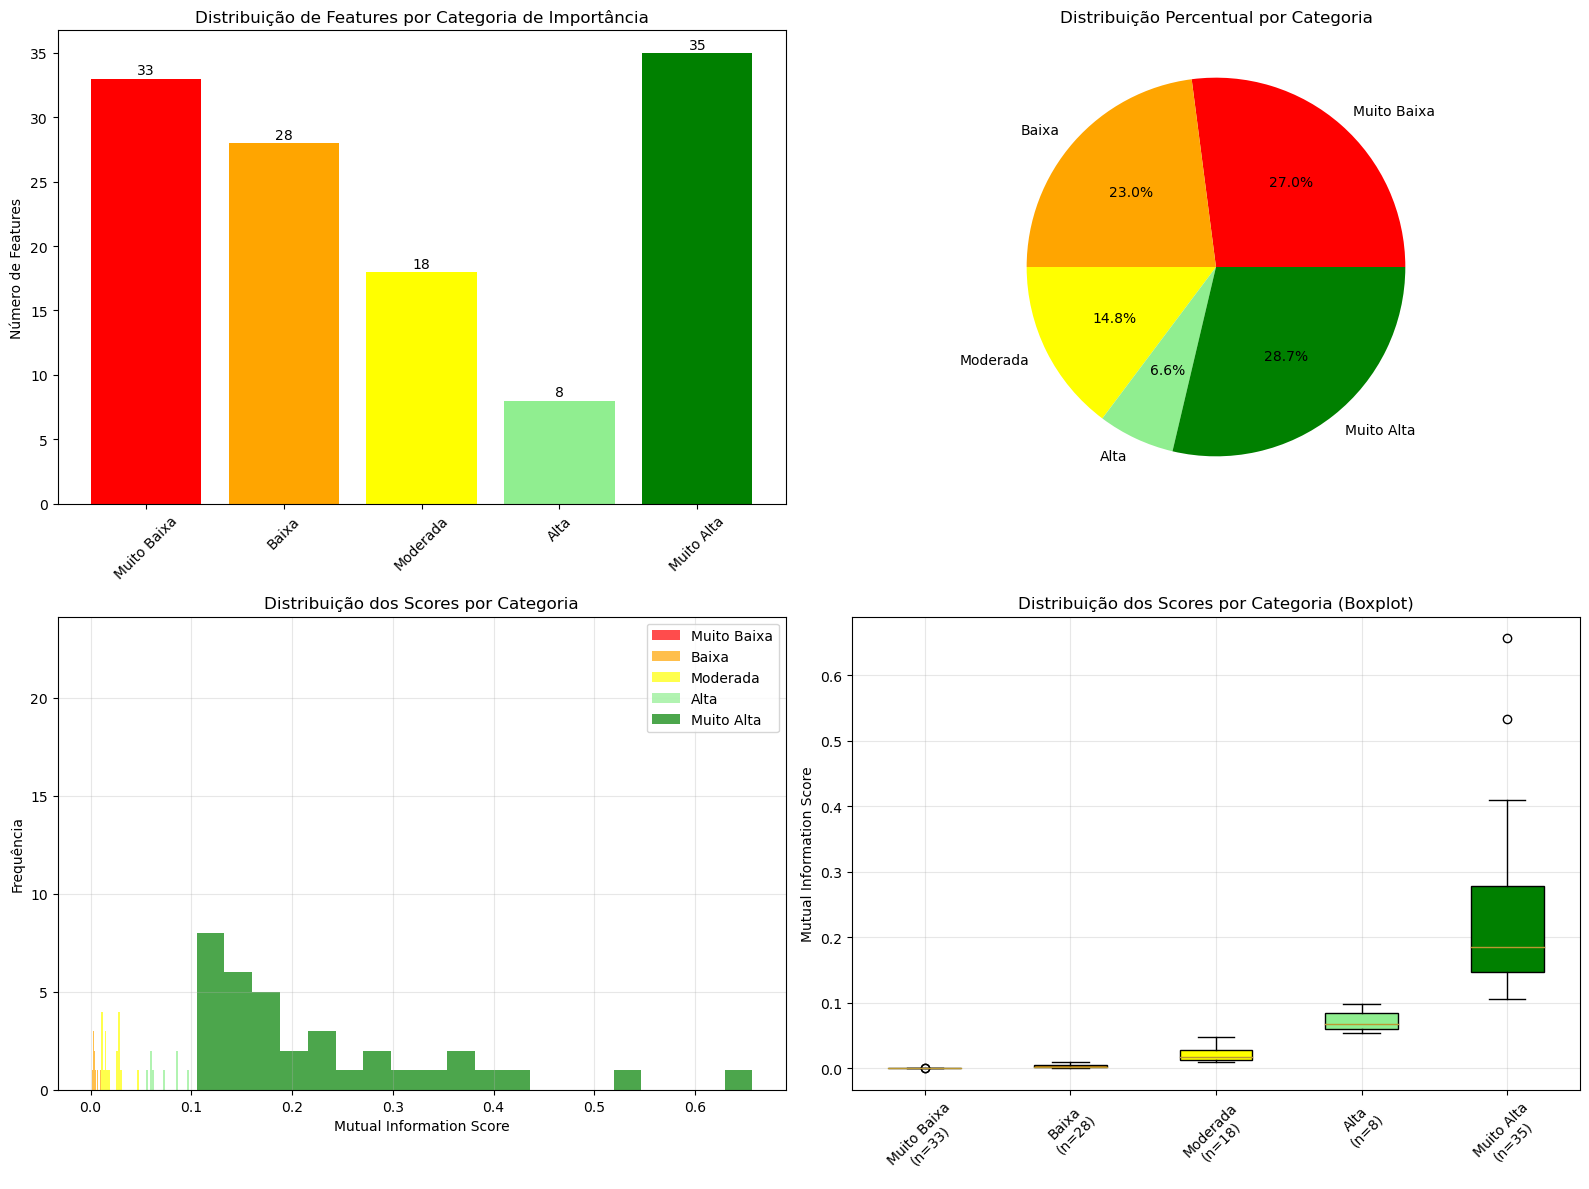

✅ Visualizações da análise por ranges geradas!

📈 Os gráficos mostram:
   • Distribuição de features por categoria de importância
   • Percentuais de cada categoria
   • Histograma dos scores colorido por categoria
   • Boxplot comparativo entre categorias

💡 Use essas visualizações para:
   • Identificar rapidamente features importantes
   • Compreender a distribuição da importância no dataset
   • Tomar decisões informadas sobre seleção de features


In [18]:
# Plotar visualizações da análise por ranges
print("📊 Gerando visualizações da análise por ranges de importância...")

# Plotar análise por ranges (4 gráficos: barras, pizza, histograma, boxplot)
analyzer.plotar_analise_ranges(figsize=(16, 12))

print("✅ Visualizações da análise por ranges geradas!")
print("\n📈 Os gráficos mostram:")
print("   • Distribuição de features por categoria de importância")
print("   • Percentuais de cada categoria")
print("   • Histograma dos scores colorido por categoria")
print("   • Boxplot comparativo entre categorias")
print("\n💡 Use essas visualizações para:")
print("   • Identificar rapidamente features importantes")
print("   • Compreender a distribuição da importância no dataset")
print("   • Tomar decisões informadas sobre seleção de features")

## 5. Executar Análise de Mutual Information 📊

In [15]:
# Gerar relatório completo da análise
analyzer.imprimir_relatorio()


📊 RELATÓRIO DE ANÁLISE DE FEATURES - MUTUAL INFORMATION
🎯 Tipo de Problema: CLASSIFICATION
📈 Total de Features: 122

📊 Estatísticas dos MI Scores:
   • Média: 0.074870
   • Desvio Padrão: 0.120726
   • Máximo: 0.656885
   • Mínimo: 0.000000

🎯 Configuração dos Thresholds:
   • Threshold Absolute: 0.005000
   • Threshold Percentil 75.0%: 0.124176

✅ Features Selecionadas:
   • Por Threshold Absolute: 69 features
   • Por Percentil: 31 features
   • Critério Combinado: 31 features

🏆 Top 10 Features:
    1. ✅ mean_os_net_bytes_sent: 0.656885
    2. ✅ mean_os_net_num_connections: 0.533648
    3. ✅ mean_process_cpu_system: 0.409151
    4. ✅ mean_process_disk_write_bytes: 0.393528
    5. ✅ mean_process_disk_read_count: 0.368032
    6. ✅ mean_process_cpu_user: 0.365441
    7. ✅ mean_process_disk_write_count: 0.344810
    8. ✅ mean_process_disk_read_chars: 0.324074
    9. ✅ mean_os_net_packets_sent: 0.285425
   10. ✅ mean_os_net_bytes_recv: 0.272297


## 11. Integração com DatasetManager 🔄

In [16]:
# Testar integração do FeatureAnalyzer com DatasetManager
print("🔄 Testando integração FeatureAnalyzer + DatasetManager...")

# Criar novo DatasetManager para teste da integração
dm_integracao = DatasetManager('svm_integracao_teste')

# Carregar dados novamente
dm_integracao.carregar_dados_csv(
    arquivo_csv='../datasets/svm.csv',
    target_column='target',
    colunas_excluir=['os_timestamp', 'node_name', 'iteration']
)

# Usar método integrado para análise de features
print(f"\n🧠 Executando análise integrada...")
resultados_integrados = dm_integracao.analisar_features_mutual_information(
    threshold_mutual_info=0.01,
    threshold_percentile=80.0,
    aplicar_selecao=True,  # Aplicar seleção automaticamente
    metodo_selecao='combined'
)

print(f"\n✅ Análise integrada concluída!")
print(f"📊 Informações após seleção automática:")
dm_integracao.imprimir_informacoes()

# Comparar shapes antes e depois da seleção
print(f"\n📈 Comparação de shapes:")
print(f"   • Dataset original - Features: {len(dm.dataset['features'])}")
print(f"   • Dataset com seleção - Features: {len(dm_integracao.dataset['features'])}")
print(f"   • Redução: {len(dm.dataset['features']) - len(dm_integracao.dataset['features'])} features")
print(f"   • Percentual mantido: {len(dm_integracao.dataset['features'])/len(dm.dataset['features'])*100:.1f}%")

🔄 Testando integração FeatureAnalyzer + DatasetManager...
🔧 Carregando dados do arquivo: ../datasets/svm.csv
📊 Informações do dataset:
   • Total de registros: 80,648
   • Total de features: 122
   • Colunas excluídas: ['os_timestamp', 'node_name', 'iteration', 'target']
   • Target codificado: {'interf': 0, 'normal': 1}

✅ Dados preparados:
   • X_train shape: (48388, 122)
   • X_val shape: (16130, 122)
   • X_test shape: (16130, 122)
   • Classes únicas: [0 1]

🧠 Executando análise integrada...
🧠 Iniciando análise de features com Mutual Information...
🧠 Calculando Mutual Information...
   • Tipo de problema detectado: classification
   • Número de features: 122
   • Número de amostras: 48388
   ✅ Análise concluída:
   • Média MI: 0.0744
   • Threshold percentil 80.0%: 0.1510
   • Features selecionadas (combinado): 25
🎯 Features selecionadas por combined: 25
🎯 Aplicando seleção automática de features...
🎯 Aplicando seleção de features: 25 features
   ✅ Seleção aplicada:
   • Novo shap

## 12. Relatório Final e Conclusões 📋

In [17]:
# Relatório final e demonstração da nova funcionalidade de ranges
print("📋 RELATÓRIO FINAL - ANÁLISE COMPLETA DE FEATURES")
print("=" * 70)

# Usar o analisador já existente para demonstrar a nova funcionalidade
print("\n🎯 Nova Funcionalidade: Análise por Ranges de Importância")

# Executar análise por ranges
analyzer.imprimir_analise_ranges()

print(f"\n📊 Testando seleção por categorias:")

# Selecionar features de alta importância
features_alta_importancia = analyzer.selecionar_features_por_categoria(['Alta', 'Muito Alta'])

# Selecionar features de importância moderada ou superior
features_moderada_superior = analyzer.selecionar_features_por_categoria(['Moderada', 'Alta', 'Muito Alta'])

# Selecionar apenas features de importância muito alta (se houver)
features_muito_alta = analyzer.selecionar_features_por_categoria(['Muito Alta'])

print(f"\n🎯 Recomendações de Uso:")
print(f"   • Para modelos simples: Use features de categoria 'Alta' e 'Muito Alta' ({len(features_alta_importancia)} features)")
print(f"   • Para modelos robustos: Use features 'Moderada' ou superior ({len(features_moderada_superior)} features)")
print(f"   • Para máxima performance: Foque nas features 'Muito Alta' ({len(features_muito_alta)} features)")

print(f"\n✅ Análise de features por ranges implementada com sucesso!")
print(f"📈 Ranges definidos:")
print(f"   • Muito Baixa: [0.0 - 0.001)")
print(f"   • Baixa: [0.001 - 0.01)")
print(f"   • Moderada: [0.01 - 0.05)")
print(f"   • Alta: [0.05 - 0.1)")
print(f"   • Muito Alta: [0.1 - ∞)")

print(f"\n🎉 Demonstração completa finalizada!")
print("=" * 70)

📋 RELATÓRIO FINAL - ANÁLISE COMPLETA DE FEATURES

🎯 Nova Funcionalidade: Análise por Ranges de Importância

🎯 ANÁLISE DE FEATURES POR RANGES DE IMPORTÂNCIA
📊 Definição dos Ranges:
   • Muito Baixa: [0.0 - 0.001)
   • Baixa: [0.001 - 0.01)
   • Moderada: [0.01 - 0.05)
   • Alta: [0.05 - 0.1)
   • Muito Alta: [0.1 - ∞)

📈 Distribuição das Features por Categoria:

🔶 Muito Baixa:
   • Quantidade: 33 features (27.0%)
   • Range: [0.0 - 0.001)
   • Scores: 0.000000 - 0.000949
   • Média: 0.000163 (±0.000283)
   • Exemplos: mean_process_net_tx_colls, mean_os_cpu_guest_nice, mean_os_disk_read_merge, mean_container_net_rx_frame, mean_container_net_rx_drop ...

🔶 Baixa:
   • Quantidade: 28 features (23.0%)
   • Range: [0.001 - 0.01)
   • Scores: 0.001013 - 0.009991
   • Média: 0.003738 (±0.002489)
   • Exemplos: mean_process_mem_size, mean_container_disk_8:0_total, mean_os_mem_nr_active_anon, mean_container_disk_8:0_write, mean_container_disk_8:0_async ...

🔶 Moderada:
   • Quantidade: 18 featur

## 13. Visualizações da Análise por Ranges 📊

In [19]:
# Gerar relatório final completo
print("📋 RELATÓRIO FINAL DA ANÁLISE DE FEATURES")
print("=" * 70)

# Usar método integrado para relatório
dm_integracao.imprimir_relatorio_features()

# Resumo das principais descobertas
print(f"\n🎯 PRINCIPAIS DESCOBERTAS:")
print("=" * 50)

# Obter ranking das features integradas
ranking_final = dm_integracao.get_feature_ranking()

# Top 10 features mais importantes
top_10_final = ranking_final.head(10)

print(f"\n🏆 TOP 10 FEATURES MAIS IMPORTANTES (por Mutual Information):")
for i, row in top_10_final.iterrows():
    status = "✅ SELECIONADA" if row['selected_combined'] else "❌ NÃO SELECIONADA"
    print(f"   {row['rank']:2d}. {row['feature']:30s} | MI: {row['mutual_info_score']:.6f} | {status}")

# Estatísticas finais
print(f"\n📊 ESTATÍSTICAS FINAIS:")
print(f"   • Total de features analisadas: {len(ranking_final)}")
print(f"   • Features selecionadas (método combinado): {ranking_final['selected_combined'].sum()}")
print(f"   • Percentual de redução: {(1 - ranking_final['selected_combined'].sum()/len(ranking_final))*100:.1f}%")
print(f"   • MI score médio das selecionadas: {ranking_final[ranking_final['selected_combined']]['mutual_info_score'].mean():.6f}")
print(f"   • MI score médio das não selecionadas: {ranking_final[~ranking_final['selected_combined']]['mutual_info_score'].mean():.6f}")

print(f"\n✅ ANÁLISE DE FEATURES CONCLUÍDA COM SUCESSO!")
print(f"🎉 O FeatureAnalyzer está pronto para uso em projetos de ML!")

# Salvar dataset com features selecionadas
arquivo_final = dm_integracao.salvar_dataset('./datasets/svm_features_selecionadas.pkl')
print(f"\n💾 Dataset com features selecionadas salvo em: {arquivo_final}")

📋 RELATÓRIO FINAL DA ANÁLISE DE FEATURES

📊 RELATÓRIO DE ANÁLISE DE FEATURES - MUTUAL INFORMATION
🎯 Tipo de Problema: CLASSIFICATION
📈 Total de Features: 122

📊 Estatísticas dos MI Scores:
   • Média: 0.074420
   • Desvio Padrão: 0.120609
   • Máximo: 0.658256
   • Mínimo: 0.000000

🎯 Configuração dos Thresholds:
   • Threshold Absolute: 0.010000
   • Threshold Percentil 80.0%: 0.151021

✅ Features Selecionadas:
   • Por Threshold Absolute: 58 features
   • Por Percentil: 25 features
   • Critério Combinado: 25 features

🏆 Top 10 Features:
    1. ✅ mean_os_net_bytes_sent: 0.658256
    2. ✅ mean_os_net_num_connections: 0.534539
    3. ✅ mean_process_cpu_system: 0.407896
    4. ✅ mean_process_disk_write_bytes: 0.394040
    5. ✅ mean_process_cpu_user: 0.363498
    6. ✅ mean_process_disk_read_count: 0.362243
    7. ✅ mean_process_disk_write_count: 0.346691
    8. ✅ mean_process_disk_read_chars: 0.322347
    9. ✅ mean_os_net_packets_sent: 0.289194
   10. ✅ mean_os_net_bytes_recv: 0.270810



In [9]:
# Selecionar features de importância moderada ou superior
from dataset_manager import DatasetManager
# Importar bibliotecas necessárias
import warnings
warnings.filterwarnings('ignore')

dm_integracao = DatasetManager('svm_integracao_teste')



# Carregar dados novamente
dm_integracao.carregar_dados_csv(
    arquivo_csv='../datasets/svm.csv',
    target_column='target',
    colunas_excluir=['os_timestamp', 'node_name', 'iteration']
)


# features_selecionadas = analyzer.selecionar_features_por_categoria(['Baixa', 'Moderada', 'Alta','Muito Alta'])
features_selecionadas = ['mean_os_cpu_ctx_switches', 'mean_os_cpu_guest', 'mean_os_cpu_guest_nice', 'mean_os_cpu_idle', 'mean_os_cpu_interrupts', 
 'mean_os_cpu_iowait', 'mean_os_cpu_irq', 'mean_os_cpu_nice', 'mean_os_cpu_soft_interrupts', 'mean_os_cpu_softirq',
 'mean_os_cpu_steal', 'mean_os_cpu_syscalls', 'mean_os_cpu_system', 'mean_os_cpu_user', 'mean_os_disk_discard_io', 
 'mean_os_disk_discard_merges', 'mean_os_disk_discard_sectors', 'mean_os_disk_discard_ticks', 'mean_os_disk_in_flight', 
 'mean_os_disk_io_ticks', 'mean_os_disk_read_io', 'mean_os_disk_read_merge', 'mean_os_disk_read_sectors',
 'mean_os_disk_read_ticks', 'mean_os_disk_time_in_queue', 'mean_os_disk_write_io', 'mean_os_disk_write_merge', 
 'mean_os_disk_write_sectors', 'mean_os_disk_write_ticks', 'mean_os_mem_nr_active_anon', 'mean_os_mem_nr_active_file', 
 'mean_os_mem_nr_inactive_anon', 'mean_os_mem_nr_inactive_file', 'mean_os_mem_nr_mapped', 'mean_os_mem_pgfault',
 'mean_os_mem_pgfree', 'mean_os_mem_pgmajfault', 'mean_os_mem_pgpgin', 'mean_os_mem_pgpgout', 'mean_os_mem_pgreuse',
 'mean_os_net_bytes_recv', 'mean_os_net_bytes_sent', 'mean_os_net_dropin', 'mean_os_net_dropout', 'mean_os_net_errin',
 'mean_os_net_errout', 'mean_os_net_num_connections', 'mean_os_net_packets_recv', 'mean_os_net_packets_sent',
 'mean_process_cpu_children_system', 'mean_process_cpu_children_user', 'mean_process_cpu_iowait', 
 'mean_process_cpu_system', 'mean_process_cpu_user', 'mean_process_disk_read_bytes', 'mean_process_disk_read_chars', 
 'mean_process_disk_read_count', 'mean_process_disk_write_bytes', 'mean_process_disk_write_chars', 'mean_process_disk_write_count', 
 'mean_process_mem_data', 'mean_process_mem_dt', 'mean_process_mem_lib', 'mean_process_mem_resident', 'mean_process_mem_shared',
 'mean_process_mem_size', 'mean_process_mem_text', 'mean_process_net_rx_bytes', 'mean_process_net_rx_compressed',
 'mean_process_net_rx_drop', 'mean_process_net_rx_errs', 'mean_process_net_rx_fifo', 'mean_process_net_rx_frame',
 'mean_process_net_rx_multicast', 'mean_process_net_rx_packets', 'mean_process_net_tx_bytes', 'mean_process_net_tx_carrier',
 'mean_process_net_tx_colls', 'mean_process_net_tx_compressed', 'mean_process_net_tx_drop', 'mean_process_net_tx_errs',
 'mean_process_net_tx_fifo', 'mean_process_net_tx_packets', 'mean_container_cpu_nr_periods', 'mean_container_cpu_nr_throttled', 
 'mean_container_cpu_system', 'mean_container_cpu_throttled_time', 'mean_container_cpu_user', 'mean_container_disk_8:0_async', 
 'mean_container_disk_8:0_discard', 'mean_container_disk_8:0_read', 'mean_container_disk_8:0_sync', 'mean_container_disk_8:0_total',
 'mean_container_disk_8:0_write', 'mean_container_mem_active_anon', 'mean_container_mem_active_file', 'mean_container_mem_cache', 
 'mean_container_mem_inactive_anon', 'mean_container_mem_inactive_file', 'mean_container_mem_mapped_file', 'mean_container_mem_pgfault', 
 'mean_container_mem_pgmajfault', 'mean_container_mem_pgpgin', 'mean_container_mem_pgpgout', 'mean_container_mem_rss', 'mean_container_mem_unevictable', 
 'mean_container_net_rx_bytes', 'mean_container_net_rx_compressed', 'mean_container_net_rx_drop', 'mean_container_net_rx_errs',
 'mean_container_net_rx_fifo', 'mean_container_net_rx_frame', 'mean_container_net_rx_multicast', 'mean_container_net_rx_packets',
 'mean_container_net_tx_bytes', 'mean_container_net_tx_carrier', 'mean_container_net_tx_colls', 'mean_container_net_tx_compressed', 
 'mean_container_net_tx_drop', 'mean_container_net_tx_errs', 'mean_container_net_tx_fifo', 'mean_container_net_tx_packets']


features_selecionadas = ['mean_container_mem_pgpgin', 'mean_container_net_tx_packets', 'mean_os_mem_nr_mapped', 'mean_container_net_rx_packets', 
            'mean_os_mem_pgpgout', 'mean_os_disk_write_sectors', 'mean_os_disk_write_io', 'mean_container_cpu_user', 'mean_container_cpu_system', 
            'mean_container_mem_active_file', 'mean_os_mem_nr_active_file', 'mean_os_disk_time_in_queue', 'mean_container_mem_rss', 
            'mean_container_mem_inactive_anon', 'mean_container_mem_mapped_file', 'mean_os_disk_write_ticks', 'mean_os_mem_pgmajfault', 
            'mean_os_mem_pgpgin', 'mean_os_disk_io_ticks', 'mean_os_disk_read_ticks', 'mean_os_mem_nr_inactive_anon', 'mean_os_disk_write_merge', 
            'mean_container_disk_8:0_async', 'mean_container_mem_active_anon', 'mean_process_mem_shared', 'mean_process_mem_size', 'mean_os_disk_read_io',
            'mean_container_disk_8:0_total', 'mean_os_cpu_iowait', 'mean_os_disk_read_sectors', 'mean_process_net_tx_colls', 'mean_os_disk_discard_ticks', 
            'mean_os_cpu_guest_nice', 'mean_process_cpu_children_system', 'mean_container_disk_8:0_read', 
            'mean_container_net_tx_errs', 'mean_process_mem_lib', 'mean_os_disk_discard_merges', 'mean_container_net_rx_multicast', 
            'mean_container_net_rx_compressed', 'mean_process_net_rx_multicast', 'mean_container_mem_unevictable', 'mean_container_net_tx_compressed', 
            'mean_process_net_rx_fifo', 'mean_process_cpu_iowait', 'mean_os_disk_discard_io', 'mean_process_net_rx_compressed', 'mean_os_cpu_nice']
print(len(features_selecionadas))

dm_integracao.aplicar_selecao_features(features_selecionadas, salvar_automaticamente=True)
dm_integracao.aplicar_escalonamento(metodo='yeo-johnson', salvar_automaticamente=True)
dm_integracao.imprimir_informacoes()


🔧 Carregando dados do arquivo: ../datasets/svm.csv
📊 Informações do dataset:
   • Total de registros: 80,648
   • Total de features: 122
   • Colunas excluídas: ['os_timestamp', 'node_name', 'iteration', 'target']
   • Target codificado: {'interf': 0, 'normal': 1}

✅ Dados preparados:
   • X_train shape: (32259, 122)
   • X_val shape: (24195, 122)
   • X_test shape: (24194, 122)
   • Classes únicas: [0 1]
48
🎯 Aplicando seleção de features: 48 features
   ✅ Seleção aplicada:
   • Novo shape X_train: (32259, 48)
   • Features selecionadas: 48
✅ Dataset salvo com sucesso em ../datasets/svm_integracao_teste.pkl
⚖️ Aplicando escalonamento: yeo-johnson
   ✅ Escalonamento 'yeo-johnson' aplicado com sucesso
   • Treino - Média antes: 94174.967 | depois: 0.000
   • Treino - Std antes: 2795694.750 | depois: 0.829
   • Validação - Média: -0.001 | Std: 0.851
   • Teste - Média: -0.002 | Std: 0.842
✅ Dataset salvo com sucesso em ../datasets/svm_integracao_teste.pkl

📊 Informações do Dataset: svm_i

In [21]:
from dataset_manager import DatasetManager
dm_novo = DatasetManager('svm_integracao_teste')
dataset_carregado = dm_novo.carregar_dataset('../datasets/svm_integracao_teste.pkl')
dm_novo.imprimir_informacoes()

✅ Dataset carregado de ../datasets/svm_integracao_teste.pkl

📊 Informações do Dataset: svm_integracao_teste
Nome do dataset: svm_integracao_teste
X_train.shape: (48388, 48)
X_val.shape: (16130, 48)
X_test.shape: (16130, 48)
y_train length: 48388
y_val length: 16130
y_test length: 16130
X_train_scaled.shape: (48388, 48)
X_val_scaled.shape: (16130, 48)
X_test_scaled.shape: (16130, 48)
Features count: 48
Scaler type: PowerTransformer
Classes mapping: {'interf': 0, 'normal': 1}
